In [1]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp
from scipy.special import comb
from scipy.misc import factorial
from decimal import Decimal
import math
import itertools
import sys
import os
import seaborn as sns
sys.path.insert(0, 'C:/Users/Stephanie/Documents/GitHub/mwc_induction/code/analysis')
import mwc_induction_utils as mwc
mwc.set_plotting_style()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In this notebook we discuss the effect of $\Delta \varepsilon_{AI}$ on simple repression systems. Specifically, we look at how repressor titration experiments similar to Garcia's will shift as $\Delta \varepsilon_{AI}$ is changed. 

In [2]:
def simple_known(e_AI, Op):
    Rtot = np.arange(0.01, 1000., 0.01)
    NNS = 4600000
    return (Rtot, 1/(1 + (1/(1 + np.exp(-e_AI)))*(Rtot/NNS)*np.exp(-Op)))

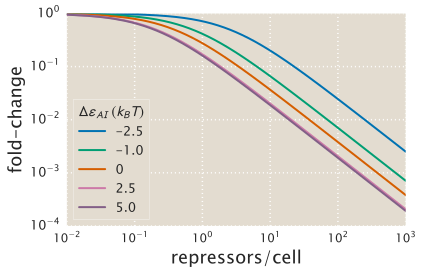

In [3]:
Oid = -17.0
e_AI_vals = [-2.5, -1.0, 0, 2.5, 5.0]
colors = sns.color_palette('colorblind', n_colors=7)
colors[4] = sns.xkcd_palette(['dusty purple'])[0]

for i in range(len(e_AI_vals)):
    plt.loglog(simple_known(e_AI_vals[i], Oid)[0], simple_known(e_AI_vals[i], Oid)[1], color=colors[i], label=e_AI_vals[i])

plt.xlabel('repressors/cell')
plt.ylabel('fold-change')
leg = plt.legend(loc='lower left', title=r'$\Delta \varepsilon_{AI}\ (k_BT)$')
leg.get_title().set_fontsize(15)
plt.tight_layout()
plt.savefig('simplerep.pdf', bbox_inches='tight')